In [1]:
#CS577_HW4_NitiW_binary
#Niti Wattanasirichaigoon
#A20406934

from keras import layers, models, optimizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
# Define generators
train_dir = 'data\\train'
validation_dir = 'data\\validation'
test_dir = 'data\\validation'

train_datagen = ImageDataGenerator(rescale=1.0/255)
test_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2400 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [18]:
# Define initial model
def build_model1():
    model = models.Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['acc'])
    return model

In [1]:
# Train initial model
model1 = build_model1()
history = model1.fit_generator(
    train_generator,
    steps_per_epoch=80,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=20)


NameError: name 'build_model1' is not defined

In [3]:
# Define plotting functions
def plot_results(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc)+1)
    
    plt.plot(epochs, acc, label='Training acc')
    plt.plot(epochs, val_acc, label='Validation acc')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss, label='Validation loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()    

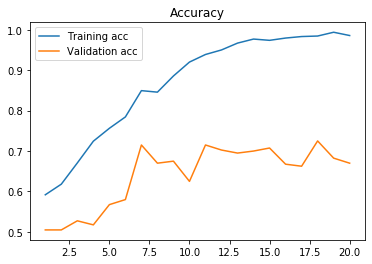

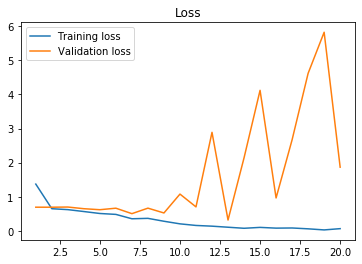

In [27]:
# Plot initial results
plot_results(history)

In [53]:
# Hyper parameter tuning
# Define model2
def build_model2():
    model = models.Sequential()
    model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(512, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='RMSprop', metrics=['acc'])
    return model

In [54]:
model2 = build_model2()
history2 = model2.fit_generator(
    train_generator,
    steps_per_epoch=80,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=20,
    verbose=2)

Epoch 1/20
 - 19s - loss: 0.9258 - acc: 0.5356 - val_loss: 0.6992 - val_acc: 0.5175
Epoch 2/20
 - 18s - loss: 0.6694 - acc: 0.5894 - val_loss: 0.6683 - val_acc: 0.6000
Epoch 3/20
 - 18s - loss: 0.6651 - acc: 0.6313 - val_loss: 0.6712 - val_acc: 0.6450
Epoch 4/20
 - 18s - loss: 0.6017 - acc: 0.6831 - val_loss: 0.6941 - val_acc: 0.6875
Epoch 5/20
 - 18s - loss: 0.5759 - acc: 0.6956 - val_loss: 0.5865 - val_acc: 0.7050
Epoch 6/20
 - 18s - loss: 0.5701 - acc: 0.7019 - val_loss: 0.7335 - val_acc: 0.6675
Epoch 7/20
 - 18s - loss: 0.4926 - acc: 0.7613 - val_loss: 0.5712 - val_acc: 0.7100
Epoch 8/20
 - 18s - loss: 0.4699 - acc: 0.7669 - val_loss: 0.8428 - val_acc: 0.7475
Epoch 9/20
 - 18s - loss: 0.4634 - acc: 0.7900 - val_loss: 0.5153 - val_acc: 0.7375
Epoch 10/20
 - 18s - loss: 0.3870 - acc: 0.8356 - val_loss: 1.2037 - val_acc: 0.7300
Epoch 11/20
 - 18s - loss: 0.4082 - acc: 0.8225 - val_loss: 0.9773 - val_acc: 0.6775
Epoch 12/20
 - 18s - loss: 0.3493 - acc: 0.8444 - val_loss: 0.9615 - val_a

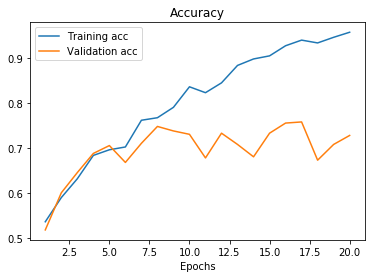

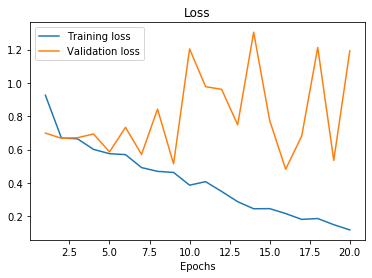

In [55]:
plot_results(history2)

In [21]:
# Define model3
def build_model3():
    model = models.Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
    return model

In [22]:
model3 = build_model3()
history3 = model3.fit_generator(
    train_generator,
    steps_per_epoch=80,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=20,
    verbose=2)

Epoch 1/20
 - 9s - loss: 0.6912 - acc: 0.6119 - val_loss: 0.6978 - val_acc: 0.5150
Epoch 2/20
 - 9s - loss: 0.6045 - acc: 0.6756 - val_loss: 0.6788 - val_acc: 0.6450
Epoch 3/20
 - 9s - loss: 0.5778 - acc: 0.7038 - val_loss: 0.6500 - val_acc: 0.6900
Epoch 4/20
 - 9s - loss: 0.4926 - acc: 0.7544 - val_loss: 0.6953 - val_acc: 0.6975
Epoch 5/20
 - 9s - loss: 0.4419 - acc: 0.8000 - val_loss: 0.5628 - val_acc: 0.6600
Epoch 6/20
 - 9s - loss: 0.4249 - acc: 0.8119 - val_loss: 0.7419 - val_acc: 0.5925
Epoch 7/20
 - 9s - loss: 0.3796 - acc: 0.8219 - val_loss: 0.6431 - val_acc: 0.6725
Epoch 8/20
 - 9s - loss: 0.3286 - acc: 0.8594 - val_loss: 0.8666 - val_acc: 0.5825
Epoch 9/20
 - 9s - loss: 0.3179 - acc: 0.8637 - val_loss: 1.3904 - val_acc: 0.5200
Epoch 10/20
 - 9s - loss: 0.2623 - acc: 0.9062 - val_loss: 0.5526 - val_acc: 0.6975
Epoch 11/20
 - 9s - loss: 0.2479 - acc: 0.9000 - val_loss: 0.6433 - val_acc: 0.7250
Epoch 12/20
 - 9s - loss: 0.2147 - acc: 0.9206 - val_loss: 0.5670 - val_acc: 0.7300
E

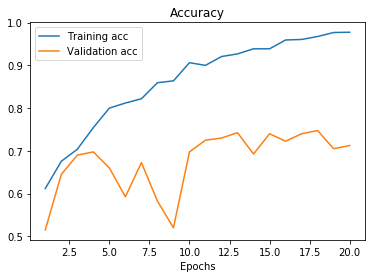

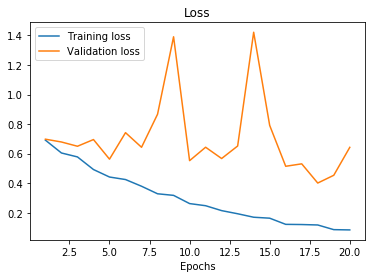

In [23]:
plot_results(history3)

In [18]:
# Define model4
def build_model4():
    model = models.Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    opt = optimizers.SGD(lr=0.001, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])
    return model

In [19]:
model4 = build_model4()
history4 = model4.fit_generator(
    train_generator,
    steps_per_epoch=80,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=20,
    verbose=2)

Epoch 1/20
 - 9s - loss: 0.6768 - acc: 0.5931 - val_loss: 0.6946 - val_acc: 0.5875
Epoch 2/20
 - 8s - loss: 0.6105 - acc: 0.6681 - val_loss: 0.6802 - val_acc: 0.5225
Epoch 3/20
 - 8s - loss: 0.5831 - acc: 0.6906 - val_loss: 0.7063 - val_acc: 0.5275
Epoch 4/20
 - 8s - loss: 0.5491 - acc: 0.7156 - val_loss: 0.6947 - val_acc: 0.5750
Epoch 5/20
 - 8s - loss: 0.5199 - acc: 0.7538 - val_loss: 0.6644 - val_acc: 0.5800
Epoch 6/20
 - 8s - loss: 0.4692 - acc: 0.7837 - val_loss: 0.6357 - val_acc: 0.6600
Epoch 7/20
 - 8s - loss: 0.4361 - acc: 0.8019 - val_loss: 0.5786 - val_acc: 0.6375
Epoch 8/20
 - 8s - loss: 0.4036 - acc: 0.8269 - val_loss: 0.5207 - val_acc: 0.6700
Epoch 9/20
 - 8s - loss: 0.4027 - acc: 0.8100 - val_loss: 0.5621 - val_acc: 0.6575
Epoch 10/20
 - 8s - loss: 0.3464 - acc: 0.8550 - val_loss: 0.6707 - val_acc: 0.6850
Epoch 11/20
 - 8s - loss: 0.3159 - acc: 0.8756 - val_loss: 0.4545 - val_acc: 0.6900
Epoch 12/20
 - 8s - loss: 0.2962 - acc: 0.8763 - val_loss: 0.7488 - val_acc: 0.7400
E

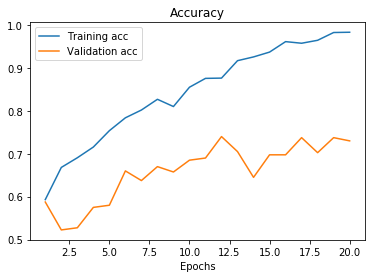

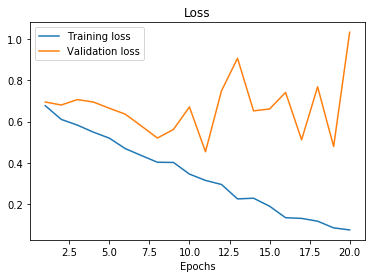

In [20]:
plot_results(history4)

In [30]:
# Train best model
final_model = build_model4()
history = final_model.fit_generator(
    train_generator,
    steps_per_epoch=80,
    epochs=19,
    validation_data=validation_generator,
    validation_steps=20,
    verbose=2)

Epoch 1/19
 - 9s - loss: 0.6680 - acc: 0.5931 - val_loss: 0.6845 - val_acc: 0.6125
Epoch 2/19
 - 8s - loss: 0.6116 - acc: 0.6869 - val_loss: 0.6635 - val_acc: 0.6475
Epoch 3/19
 - 8s - loss: 0.5754 - acc: 0.6975 - val_loss: 0.6957 - val_acc: 0.5850
Epoch 4/19
 - 8s - loss: 0.5267 - acc: 0.7400 - val_loss: 0.6088 - val_acc: 0.6475
Epoch 5/19
 - 8s - loss: 0.4999 - acc: 0.7588 - val_loss: 0.5515 - val_acc: 0.5975
Epoch 6/19
 - 8s - loss: 0.4801 - acc: 0.7600 - val_loss: 0.5851 - val_acc: 0.6800
Epoch 7/19
 - 8s - loss: 0.4417 - acc: 0.7881 - val_loss: 0.5184 - val_acc: 0.6925
Epoch 8/19
 - 8s - loss: 0.4164 - acc: 0.8138 - val_loss: 0.5004 - val_acc: 0.6450
Epoch 9/19
 - 8s - loss: 0.3947 - acc: 0.8225 - val_loss: 1.1454 - val_acc: 0.5300
Epoch 10/19
 - 8s - loss: 0.3482 - acc: 0.8606 - val_loss: 0.6509 - val_acc: 0.5625
Epoch 11/19
 - 8s - loss: 0.3031 - acc: 0.8813 - val_loss: 0.7199 - val_acc: 0.6550
Epoch 12/19
 - 8s - loss: 0.2858 - acc: 0.8925 - val_loss: 0.7919 - val_acc: 0.6975
E

In [34]:
# Evaluate model with test data
score = final_model.evaluate(test_generator)
print(score)
final_model.save('cats_dogs_small.h5')

40/40 [==============================] - 3s 66ms/step
[0.29274433851242065, 0.7124999761581421]


(1, 150, 150, 3)


<function matplotlib.pyplot.show(*args, **kw)>

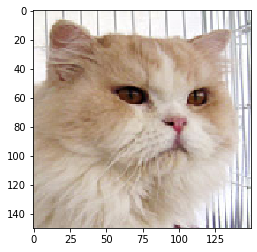

In [4]:
# Visualize layer activations
# Load and process an image

img_path = 'data\\test\\cat\\1275.jpg'
from keras.preprocessing import image
img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /=255.
print(img_tensor.shape)

plt.imshow(img_tensor[0])
plt.show

In [5]:
# create new model with intermediate outputs
model = models.load_model('cats_dogs_small.h5')

# select output of top 8 layers
layer_outputs = [layer.output for layer in model.layers[:8]]
# create new model
act_model = models.Model(inputs=model.input, outputs=layer_outputs)
# run model on image
activations = act_model.predict(img_tensor)

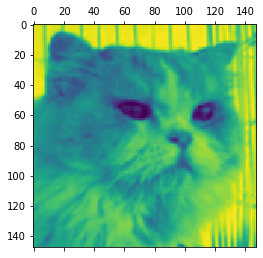

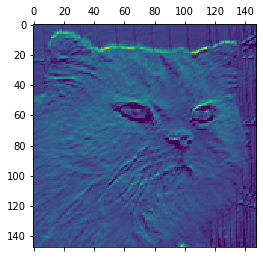

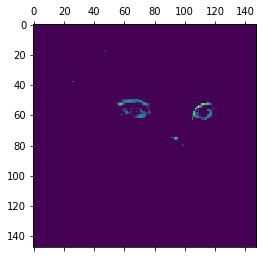

In [48]:
# Examine returned activations
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0,:,:,0])
plt.matshow(first_layer_activation[0,:,:,4])
plt.matshow(first_layer_activation[0,:,:,6])

In [6]:
# view layer names
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 15, 15, 128)      

In [7]:
# Visualize trained filters
from keras import backend as K
layer_name = 'conv2d_34'
filter_index = 0

def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    x += 0.5
    x = np.clip(x, 0, 1)
    x *= 255 # convert to [0,255]
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def generate_pattern(layer_name, filter_index, size=150):
    # Define output and loss
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    # Compute the gradient of the input with respect to loss
    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5) # normalize gradient
    iterate = K.function([model.input], [loss, grads])
    #initialize input image
    input_img = np.random.random((1, size, size, 3)) *20+128.
    # run gradient ascent for 40 steps
    step = 1.
    for i in range(20):
        loss_val, grads_val = iterate([input_img])
        input_img += grads_val * step
    img = input_img[0]
    return deprocess_image(img)

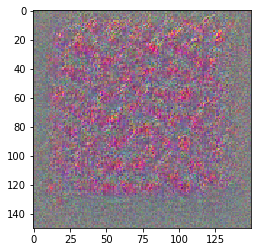

In [8]:
plt.imshow(generate_pattern('conv2d_36',0))

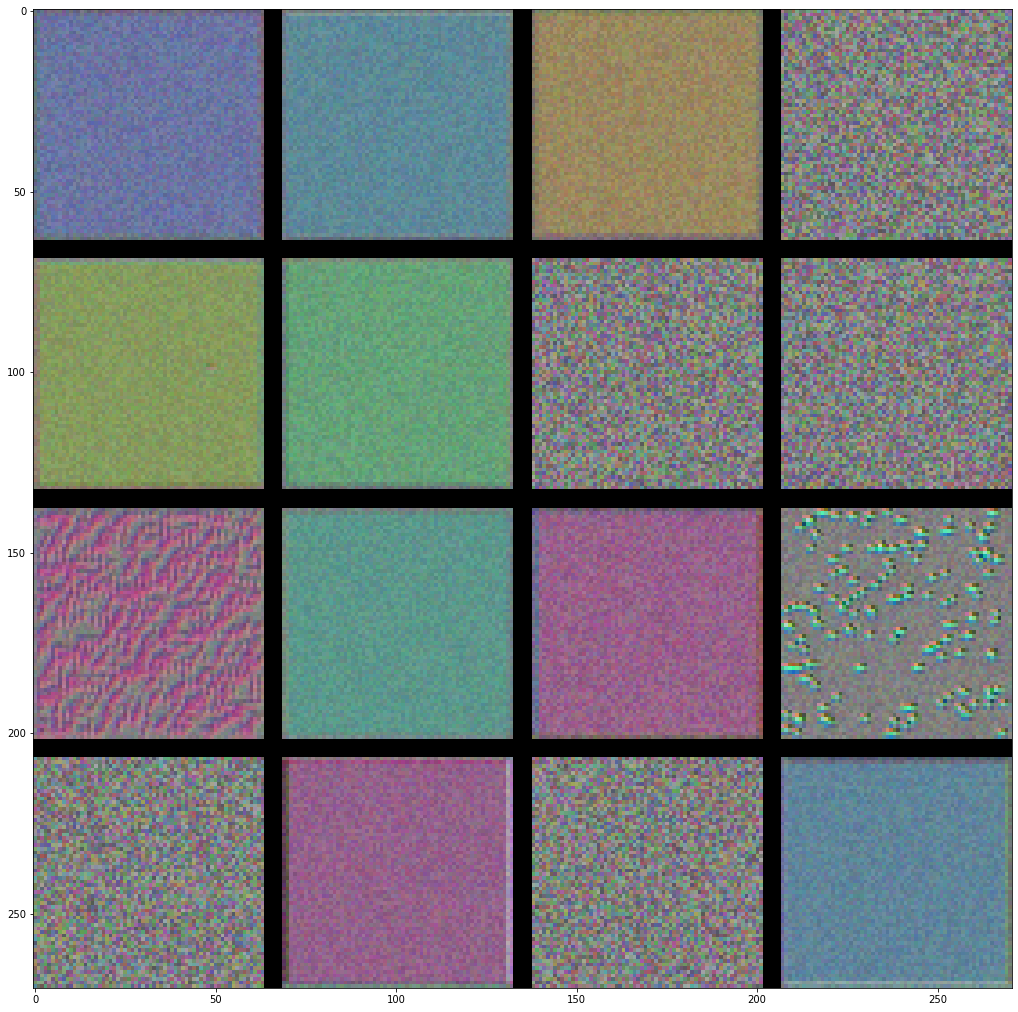

In [43]:
# Visualize first 16 filters in each layer

size = 64
margin = 5

def view_filters(layername):
    results = np.zeros((4*size+3*margin, 4*size+3*margin,3))
    for i in range(4):
        for j in range(4):
            filter_img = generate_pattern(layername, i*4 +j, size=size)
            horizontal_start = i*size + i*margin
            horizontal_end = horizontal_start + size
            vertical_start = j*size + j*margin
            vertical_end = vertical_start + size
            results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img
    plt.figure(figsize=(18,18))
    plt.imshow(results.astype('uint8'))
    
view_filters('conv2d_33') # 1st conv layer

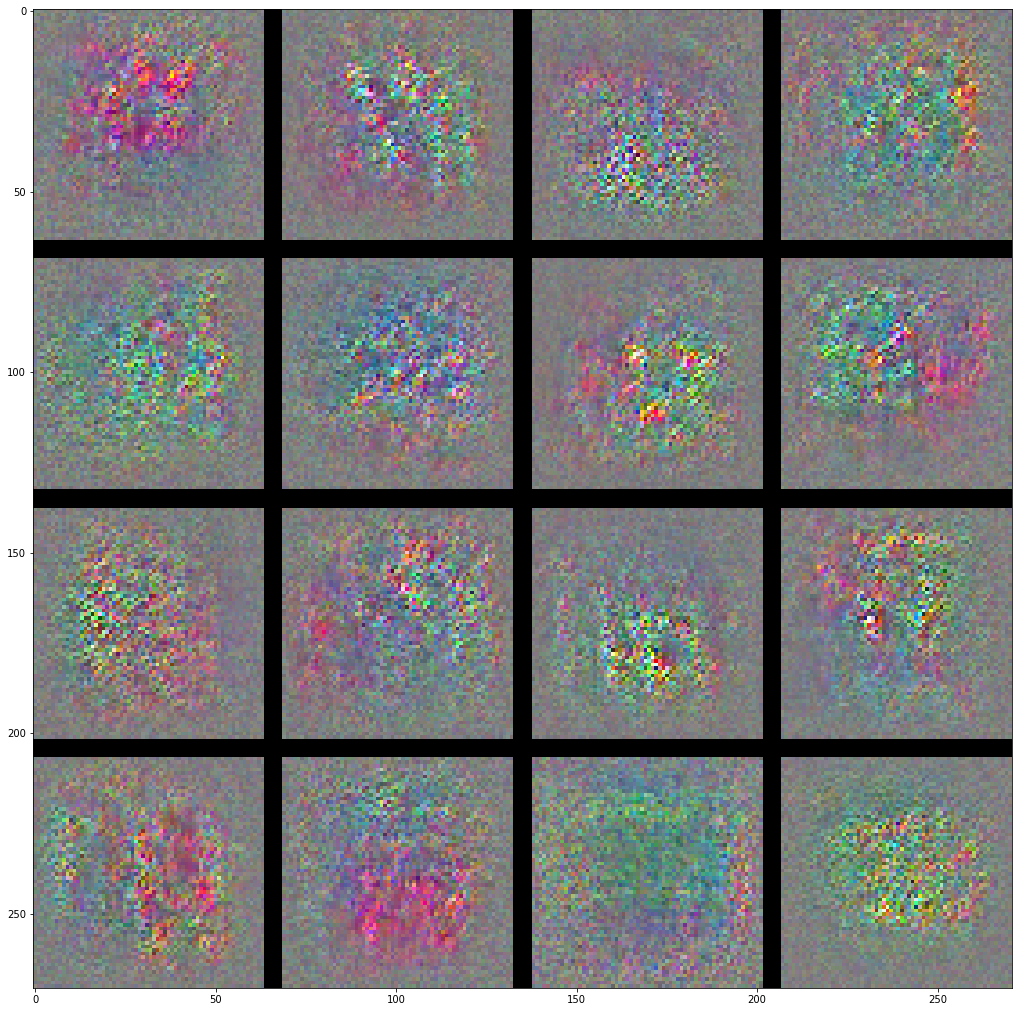

In [44]:
view_filters('conv2d_36') # 4th conv layer

In [4]:
# Transfer Learning - VGG16

from keras.applications import VGG16
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [6]:
# build model using pre-trained conv layers

# Freeze VGG16 weights
conv_base.trainable=False

def build_trans_model():
    model = Sequential()
    model.add(conv_base)
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    opt = optimizers.SGD(lr=0.001, momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['acc'])
    return model

model5 = build_trans_model()
model5.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [7]:
# Train model
history5 = model5.fit_generator(
    train_generator,
    steps_per_epoch=80,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=20,
    verbose=2)

Epoch 1/20
 - 84s - loss: 0.4504 - acc: 0.7819 - val_loss: 0.4421 - val_acc: 0.8350
Epoch 2/20
 - 44s - loss: 0.3228 - acc: 0.8569 - val_loss: 0.3743 - val_acc: 0.8400
Epoch 3/20
 - 30s - loss: 0.2739 - acc: 0.8806 - val_loss: 0.1754 - val_acc: 0.8750
Epoch 4/20
 - 30s - loss: 0.2530 - acc: 0.8931 - val_loss: 0.3367 - val_acc: 0.8900
Epoch 5/20
 - 30s - loss: 0.2008 - acc: 0.9281 - val_loss: 0.4511 - val_acc: 0.8850
Epoch 6/20
 - 30s - loss: 0.2162 - acc: 0.9094 - val_loss: 0.2309 - val_acc: 0.8750
Epoch 7/20
 - 30s - loss: 0.1806 - acc: 0.9275 - val_loss: 0.2031 - val_acc: 0.9025
Epoch 8/20
 - 30s - loss: 0.2057 - acc: 0.9075 - val_loss: 0.4924 - val_acc: 0.8825
Epoch 9/20
 - 30s - loss: 0.1694 - acc: 0.9269 - val_loss: 0.0851 - val_acc: 0.8875
Epoch 10/20
 - 30s - loss: 0.1499 - acc: 0.9444 - val_loss: 0.2064 - val_acc: 0.8925
Epoch 11/20
 - 30s - loss: 0.1613 - acc: 0.9362 - val_loss: 0.4096 - val_acc: 0.8850
Epoch 12/20
 - 30s - loss: 0.1366 - acc: 0.9500 - val_loss: 0.1676 - val_a

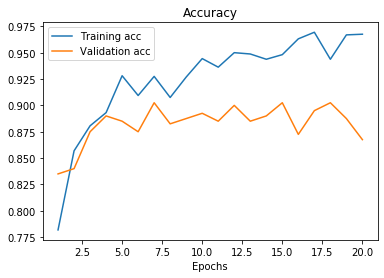

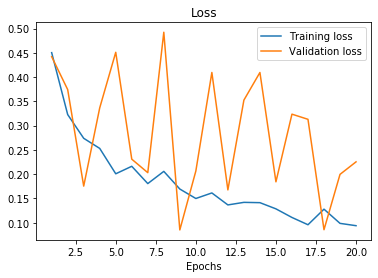

In [8]:
plot_results(history5)

In [9]:
# Evaluate model with test data
score = model5.evaluate(test_generator)
print(score)
model5.save('cats_dogs_transfer1.h5')

40/40 [==============================] - 12s 295ms/step
[0.032155174762010574, 0.8550000190734863]


In [10]:
# Unfreeze block5 of the conv_base for fine tuning
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable == True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

# continue to train for 15 epochs
history6 = model5.fit_generator(
    train_generator,
    steps_per_epoch=80,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=20,
    verbose=2)


Epoch 1/15
 - 30s - loss: 0.0880 - acc: 0.9694 - val_loss: 0.3438 - val_acc: 0.8800
Epoch 2/15
 - 30s - loss: 0.0850 - acc: 0.9737 - val_loss: 0.2938 - val_acc: 0.8925
Epoch 3/15
 - 30s - loss: 0.1113 - acc: 0.9569 - val_loss: 0.2328 - val_acc: 0.9025
Epoch 4/15
 - 30s - loss: 0.0736 - acc: 0.9769 - val_loss: 0.1591 - val_acc: 0.8925
Epoch 5/15
 - 30s - loss: 0.0797 - acc: 0.9750 - val_loss: 0.1357 - val_acc: 0.8725
Epoch 6/15
 - 30s - loss: 0.0927 - acc: 0.9625 - val_loss: 0.4792 - val_acc: 0.8775
Epoch 7/15
 - 30s - loss: 0.0876 - acc: 0.9650 - val_loss: 0.0948 - val_acc: 0.8750
Epoch 8/15
 - 30s - loss: 0.0584 - acc: 0.9844 - val_loss: 0.1618 - val_acc: 0.8900
Epoch 9/15
 - 30s - loss: 0.0571 - acc: 0.9856 - val_loss: 0.3173 - val_acc: 0.8900
Epoch 10/15
 - 30s - loss: 0.0702 - acc: 0.9787 - val_loss: 0.0875 - val_acc: 0.8875
Epoch 11/15
 - 30s - loss: 0.0408 - acc: 0.9937 - val_loss: 0.2945 - val_acc: 0.8950
Epoch 12/15
 - 30s - loss: 0.0482 - acc: 0.9887 - val_loss: 0.5901 - val_a

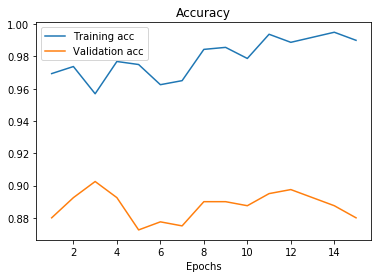

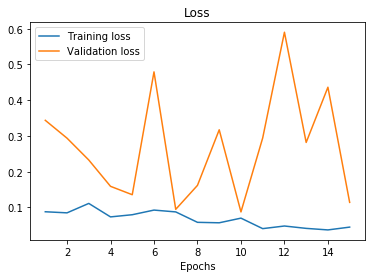

In [11]:
plot_results(history6)
model5.save('cats_dogs_transfer2.h5')

In [12]:
# Evaluate model with test data
score = model5.evaluate(test_generator)
print(score)

40/40 [==============================] - 12s 295ms/step
[0.10004408657550812, 0.8899999856948853]


In [13]:
# Data Augmentation

# Redefine train generator
train_dir = 'data\\train'
validation_dir = 'data\\validation'
test_dir = 'data\\validation'

train_datagen2 = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

Found 2400 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [21]:
# Freeze conv_base weights and retrain network
conv_base.trainable=False

model7 = build_trans_model()
history7 = model7.fit_generator(
    train_generator,
    steps_per_epoch=80,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=20,
    verbose=2)

Epoch 1/20
 - 30s - loss: 0.4648 - acc: 0.7856 - val_loss: 0.2185 - val_acc: 0.8225
Epoch 2/20
 - 30s - loss: 0.3526 - acc: 0.8475 - val_loss: 0.2515 - val_acc: 0.8450
Epoch 3/20
 - 30s - loss: 0.2639 - acc: 0.8944 - val_loss: 0.2662 - val_acc: 0.8700
Epoch 4/20
 - 30s - loss: 0.2469 - acc: 0.8963 - val_loss: 0.2756 - val_acc: 0.8650
Epoch 5/20
 - 30s - loss: 0.2648 - acc: 0.8881 - val_loss: 0.2565 - val_acc: 0.9125
Epoch 6/20
 - 30s - loss: 0.2240 - acc: 0.9081 - val_loss: 0.1665 - val_acc: 0.8550
Epoch 7/20
 - 30s - loss: 0.1968 - acc: 0.9269 - val_loss: 0.2972 - val_acc: 0.8850
Epoch 8/20
 - 30s - loss: 0.1899 - acc: 0.9325 - val_loss: 0.2526 - val_acc: 0.8675
Epoch 9/20
 - 30s - loss: 0.1784 - acc: 0.9312 - val_loss: 0.3353 - val_acc: 0.8500
Epoch 10/20
 - 30s - loss: 0.1580 - acc: 0.9450 - val_loss: 0.2973 - val_acc: 0.8950
Epoch 11/20
 - 30s - loss: 0.1589 - acc: 0.9438 - val_loss: 0.1206 - val_acc: 0.9050
Epoch 12/20
 - 30s - loss: 0.1703 - acc: 0.9294 - val_loss: 0.2101 - val_a

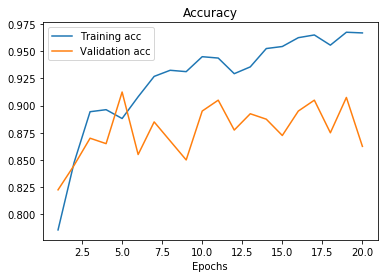

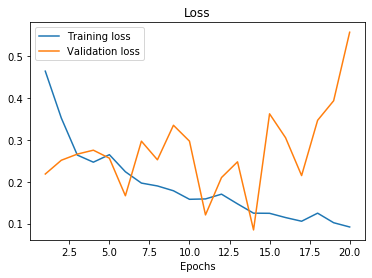

In [22]:
plot_results(history7)
model7.save('cats_dogs_transfer3.h5')

In [23]:
# Evaluate model with test data
score = model7.evaluate(test_generator)
print(score)

40/40 [==============================] - 12s 298ms/step
[0.24642756581306458, 0.8700000047683716]
